 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [3]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [4]:
# Reading whale returns
csvpath = Path("Resources/whale_returns.csv")
whale_df = pd.read_csv(csvpath, parse_dates=True, index_col='Date', infer_datetime_format=True)
whale_df.sort_index(ascending=True, inplace=True)
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [5]:
# Count nulls
whale_df.isnull().sum()
whale_df[whale_df.isnull().any(axis = 1)]

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN


In [6]:
# Drop nulls
clean_whale_df = whale_df.dropna(inplace=False)
clean_whale_df.head(5)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [7]:
# Reading algorithmic returns
Path_algo = Path("Resources/algo_returns.csv")
algo_df = pd.read_csv(Path_algo, parse_dates=True, index_col='Date', infer_datetime_format=True)

In [8]:
# Count nulls
algo_df.sort_index().isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [9]:
# Drop nulls
clean_algo_df = algo_df.sort_index().dropna(inplace=False)
clean_algo_df.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [13]:
# Reading S&P 500 Closing Prices
Path_sp = Path("Resources/sp500_history.csv")
sp500_df = pd.read_csv(Path_sp, parse_dates=True, header=1, names=['Date', 'SP500'], index_col=['Date'], infer_datetime_format=True)
sp500_df.sort_index(ascending = True, inplace = True)
sp500_df.head()

,SP500
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [15]:
# Check Data Types
sp500_df.dtypes

SP500    object
dtype: object

In [17]:
# Fix Data Types
sp500_df['SP500'] = sp500_df['SP500'].str.replace("$", "")
sp500_df['SP500'] = sp500_df['SP500'].str.replace(",", "")
"""
change take out the $ sign so that the string can be converted to a numerical datatype

"""
sp500_df['SP500'] = pd.to_numeric(sp500_df['SP500'])

In [19]:
# Calculate Daily Returns
# Drop nulls
clean_sp500_pct = sp500_df.pct_change().dropna()
clean_sp500_pct.head()

,SP500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [20]:
# Rename `Close` Column to be specific to this portfolio.
columns_sp = ['Date', 'SP500']

## Combine Whale, Algorithmic, and S&P 500 Returns

In [21]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
portfolio = pd.concat([clean_whale_df, clean_algo_df, clean_sp500_pct], axis='columns', join='inner')
portfolio.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Daily Returns'}, xlabel='Date'>

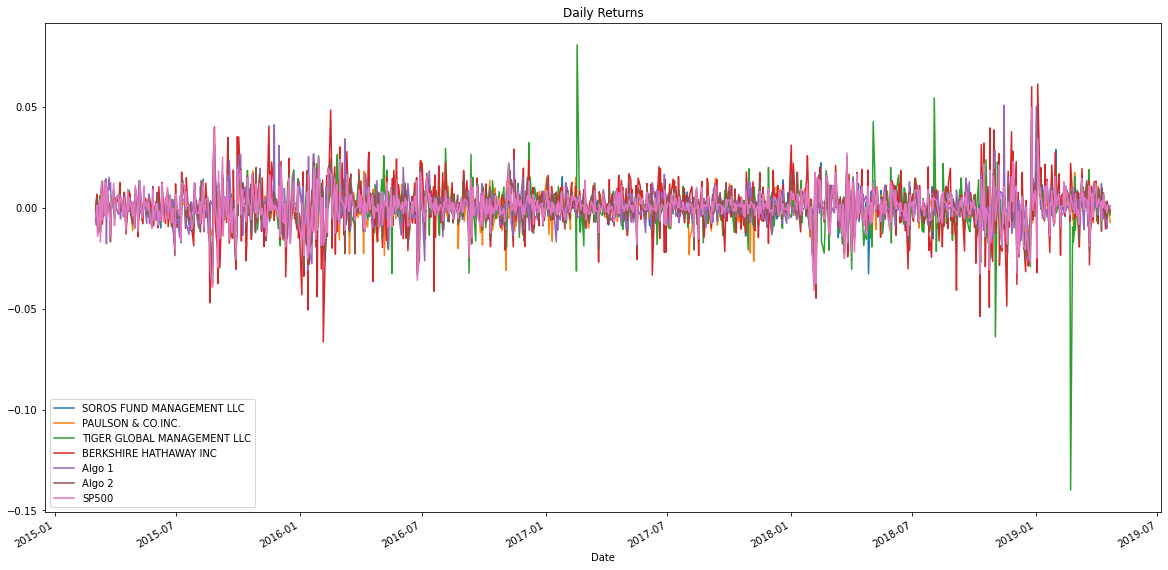

In [22]:
# Plot daily returns of all portfolios
portfolio.plot(title = 'Daily Returns' , figsize=(20,10))

#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Cum Returns'}, xlabel='Date'>

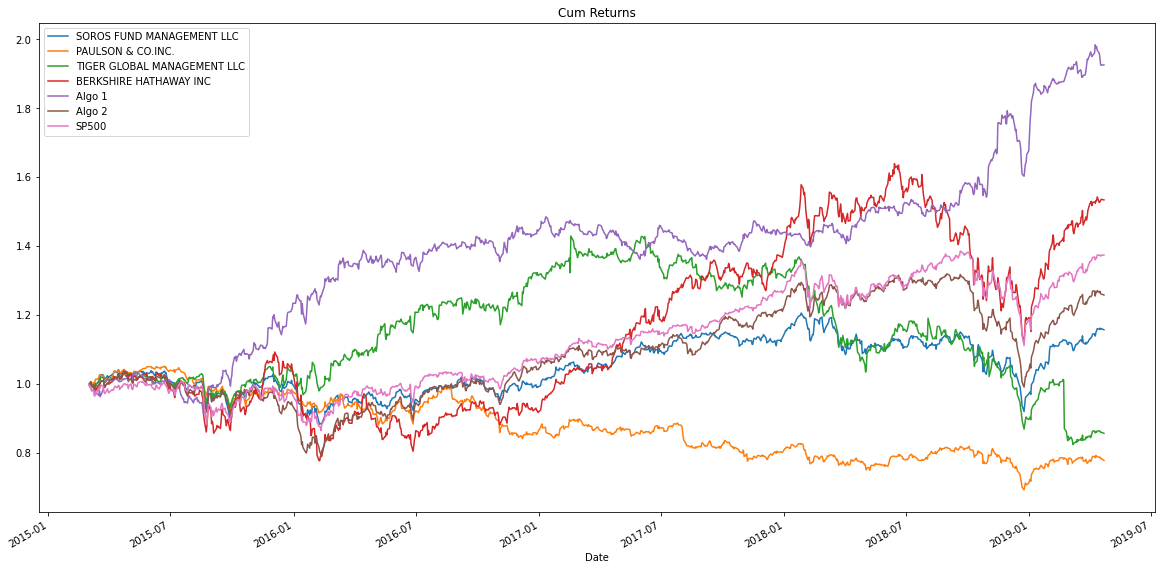

In [23]:
# Calculate cumulative returns of all portfolios
portfolio_cumulative_returns = (1 + portfolio).cumprod()
portfolio_cumulative_returns.head()
# Plot cumulative returns
portfolio_cumulative_returns.plot(title = "Cum Returns", figsize=(20,10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:title={'center':'Portfolio Risk'}>

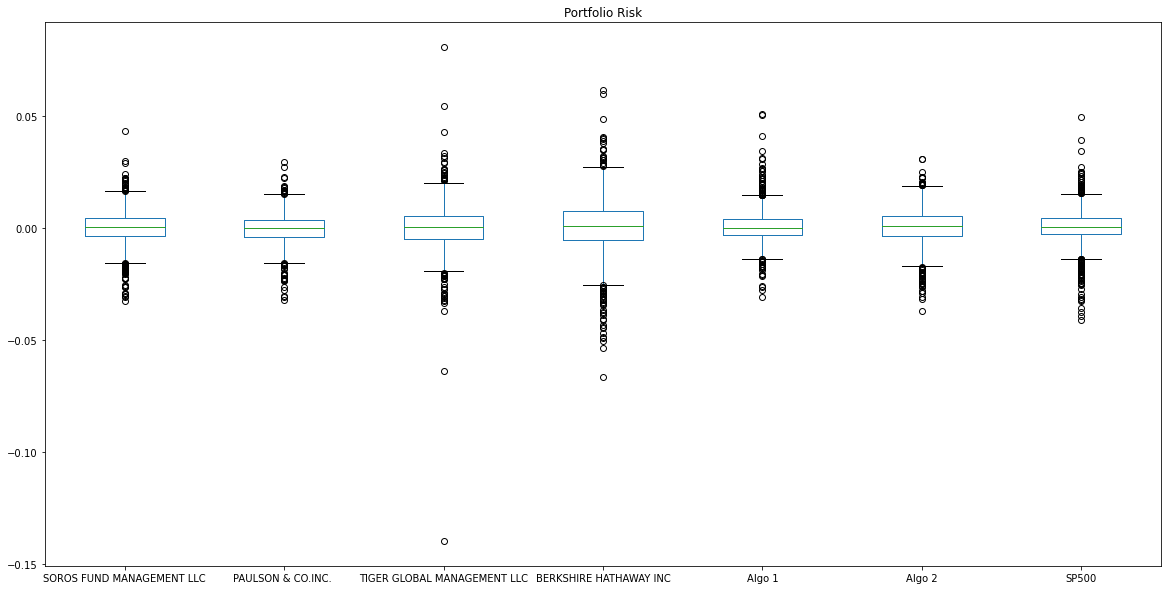

In [24]:
# Box plot to visually show risk
portfolio.plot.box(title="Portfolio Risk" , figsize=(20,10))

### Calculate Standard Deviations

In [25]:
# Calculate the daily standard deviations of all portfolios
daily_std = portfolio.std().sort_values(ascending=False)
std_df = pd.DataFrame(portfolio.std()).rename(columns = {0:"STD"})
std_df

,STD
SOROS FUND MANAGEMENT LLC,0.007896
PAULSON & CO.INC.,0.007026
TIGER GLOBAL MANAGEMENT LLC,0.010897
BERKSHIRE HATHAWAY INC,0.012919
Algo 1,0.007623
Algo 2,0.008341
SP500,0.008554


### Determine which portfolios are riskier than the S&P 500

In [26]:
# Calculate  the daily standard deviation of S&P 500
sp500_std_dev = portfolio['SP500'].std()

# Determine which portfolios are riskier than the S&P 500
riskier_than_SP500 = std_df[std_df["STD"] >= std_df.loc["SP500", "STD"]]
riskier_than_SP500

,STD
TIGER GLOBAL MANAGEMENT LLC,0.010897
BERKSHIRE HATHAWAY INC,0.012919
SP500,0.008554


### Calculate the Annualized Standard Deviation

In [27]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = std_df * np.sqrt(252)
annualized_std

,STD
SOROS FUND MANAGEMENT LLC,0.125348
PAULSON & CO.INC.,0.111527
TIGER GLOBAL MANAGEMENT LLC,0.172989
BERKSHIRE HATHAWAY INC,0.205079
Algo 1,0.121006
Algo 2,0.132413
SP500,0.135787


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'21-Day Rolling STD'}, xlabel='Date'>

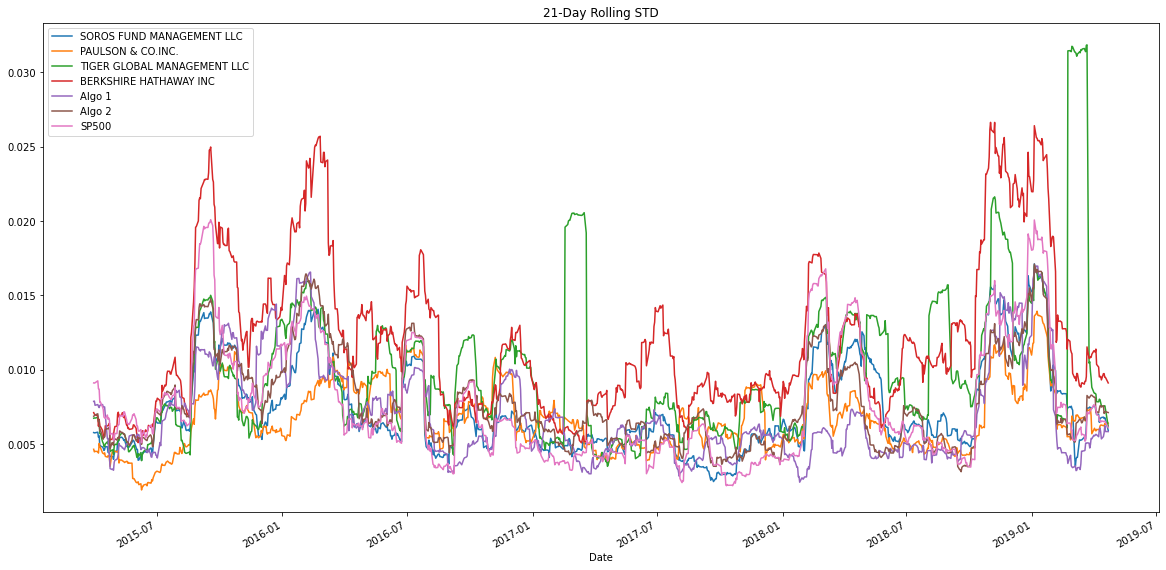

In [28]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
sp500_21_rolling = portfolio.rolling(window=21).std()
# Plot the rolling standard deviation
sp500_21_rolling.plot(title="21-Day Rolling STD", figsize=(20,10))

### Calculate and plot the correlation

In [29]:
# Calculate the correlation
correlation = portfolio.corr()
# Display de correlation matrix
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.837731
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.669636
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,0.623776
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,0.751137
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,0.279130
Algo 2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,0.858620
SP500,0.837731,0.669636,0.623776,0.751137,0.279130,0.858620,1.000000


<AxesSubplot:>

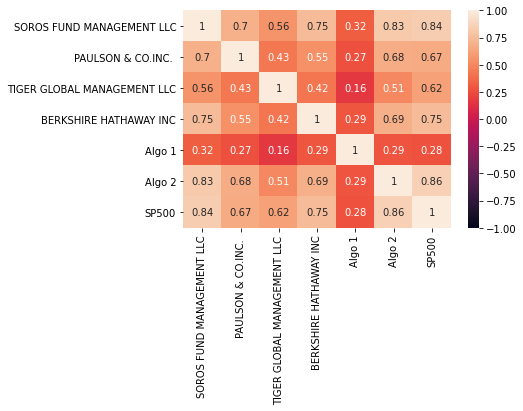

In [30]:
sns.heatmap(correlation, vmin=-1, vmax=1,annot=True)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:title={'center':'Soros 30-Day Rolling Beta'}, xlabel='Date'>

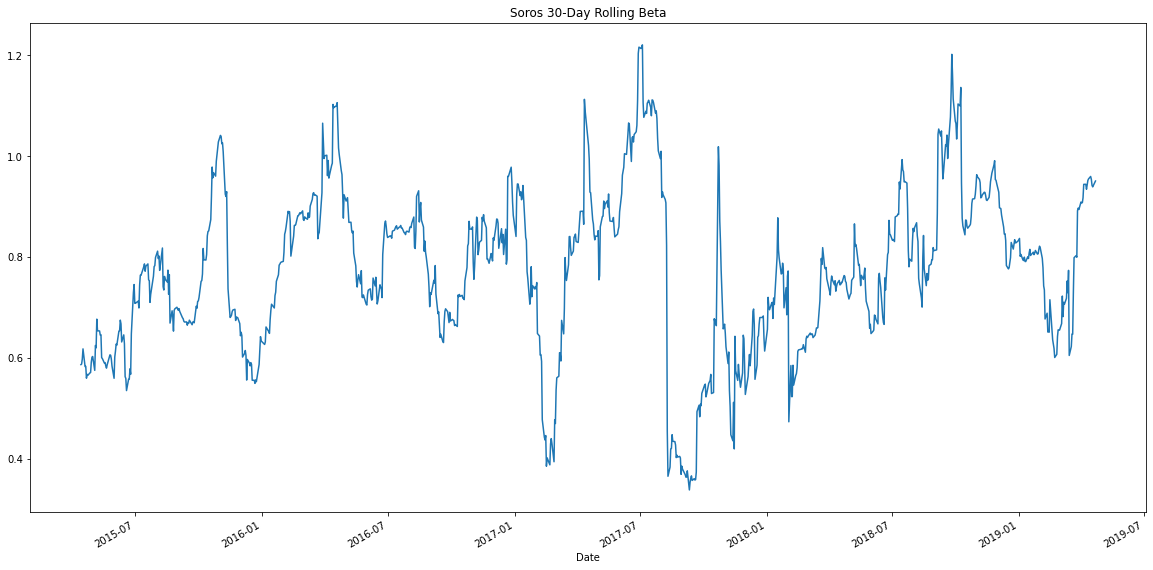

In [31]:
# Calculate covariance of a single portfolio
covar = portfolio["SOROS FUND MANAGEMENT LLC"].rolling(window=30).cov(portfolio["SP500"])
covar
# Calculate variance of S&P 500
variance_SP500 = portfolio["SP500"].rolling(window=30).var()
variance_SP500
# Computing beta
Soros_Beta = covar / variance_SP500

# Plot beta trend
Soros_Beta.plot(title="Soros 30-Day Rolling Beta", figsize=(20,10))


## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:title={'center':'Exponentially Weighted Average'}, xlabel='Date'>

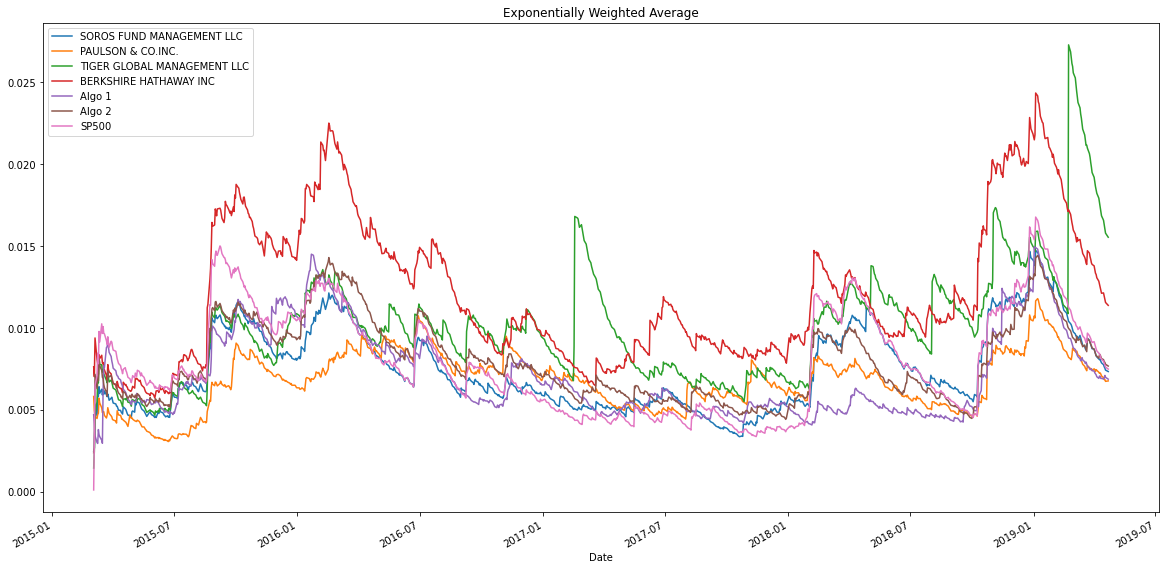

In [32]:
# Use `ewm` to calculate the rolling window
ewm_portfolio = portfolio.ewm(halflife=21, adjust=True).std().plot(title="Exponentially Weighted Average", figsize=(20,10))
ewm_portfolio

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [33]:
# Annualized Sharpe Ratios
sharpe_ratios = (portfolio.mean() * 252) / (portfolio.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
Algo 2                         0.484334
SP500                          0.633139
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

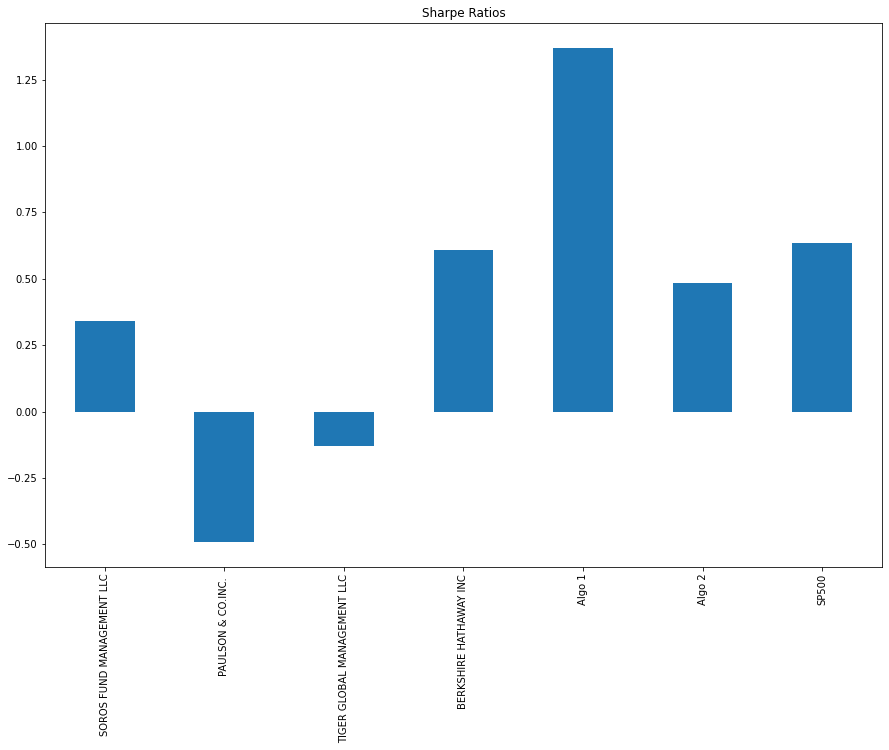

In [34]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios", figsize=(15,10))

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [39]:
# Reading data from 1st stock

csvgooglepath = Path("Resources/google_historical.csv")

google_df = pd.read_csv(csvgooglepath, parse_dates=True, infer_datetime_format=True)
google_df['Date'] = pd.to_datetime(google_df['Date'])
google_df['Date'] = google_df['Date'].dt.date

google_df = google_df.set_index(google_df['Date']).drop(columns='Date').rename(columns={'Close': 'GOOG'}).sort_index(ascending=True)
google_df = google_df.pct_change()
google_df

,GOOG
Date,
2015-03-03,NaN
2015-03-04,-0.000472
2015-03-05,0.003428
2015-03-06,-0.013298
2015-03-09,0.002049
...,...
2019-04-24,-0.006761
2019-04-25,0.005932
2019-04-26,0.006910


In [40]:
# Reading data from 2nd stock
csvapplepath = Path("Resources/apple_historical.csv")
apple_df = pd.read_csv(csvapplepath, parse_dates=['Date'], infer_datetime_format=True)
apple_df['Date'] = apple_df['Date'].dt.date
apple_df = apple_df.set_index(apple_df['Date']).drop(columns='Date')
apple_df = apple_df.rename(columns={'Close': 'AAPL'})
apple_df.sort_index(ascending=True, inplace=True)
apple_df = apple_df.pct_change()
apple_df

,AAPL
Date,
2015-03-03,NaN
2015-03-04,-0.006184
2015-03-05,-0.016801
2015-03-06,0.001582
2015-03-09,0.004423
...,...
2019-04-24,-0.001542
2019-04-25,-0.009075
2019-04-26,-0.004677


In [41]:
# Reading data from 3rd stock
csvCOSTCOpath = Path("Resources/costco_historical.csv")
costco_df = pd.read_csv(csvCOSTCOpath, parse_dates=['Date'], infer_datetime_format=True)
costco_df['Date'] = costco_df['Date'].dt.date
costco_df = costco_df.set_index(costco_df['Date']).drop(columns='Date')
costco_df = costco_df.rename(columns={'Close': 'COST'})
costco_df.sort_index(ascending=True, inplace=True)
costco_df = costco_df.pct_change()
costco_df

,COST
Date,
2015-03-03,NaN
2015-03-04,-0.001357
2015-03-05,0.027179
2015-03-06,-0.010783
2015-03-09,0.007623
...,...
2019-04-24,0.009691
2019-04-25,-0.009518
2019-04-26,-0.007248


In [43]:
# Combine all stocks in a single DataFrame
# Reorganize portfolio data by having a column per symbol
# Reset Date index
# Calculate daily returns
# Drop NAs
# Display sample data
combined_df = pd.concat([costco_df, google_df, apple_df], axis="columns", join="inner").dropna()
combined_df

,COST,GOOG,AAPL
Date,,,
2015-03-04,-0.001357,-0.000472,-0.006184
2015-03-05,0.027179,0.003428,-0.016801
2015-03-06,-0.010783,-0.013298,0.001582
2015-03-09,0.007623,0.002049,0.004423
2015-03-10,-0.016724,-0.024326,-0.020761
...,...,...,...
2019-04-24,0.009691,-0.006761,-0.001542
2019-04-25,-0.009518,0.005932,-0.009075
2019-04-26,-0.007248,0.006910,-0.004677


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [44]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
port_return = combined_df.dot(weights)
port_return

Date
2015-03-04   -0.002671
2015-03-05    0.004602
2015-03-06   -0.007500
2015-03-09    0.004699
2015-03-10   -0.020604
                ...   
2019-04-24    0.000463
2019-04-25   -0.004220
2019-04-26   -0.001671
2019-04-29    0.005121
2019-04-30   -0.030336
Length: 1047, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [45]:
# Join your returns DataFrame to the original returns DataFrame
# Only compare dates where return data exists for all the stocks (drop NaNs)

portfolio['Custom'] = port_return
portfolio[pd.isna(portfolio['Custom'])]
portfolio.dropna(inplace=True)
portfolio

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500,Custom
Date,,,,,,,,
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389,-0.002671
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196,0.004602
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174,-0.007500
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944,0.004699
2015-03-10,-0.010263,-0.005341,-0.012079,-0.009739,-0.001392,-0.012155,-0.016961,-0.020604
...,...,...,...,...,...,...,...,...
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000629,0.007522
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509,0.000306
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274,0.009292


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [46]:
# Calculate the annualized `std`
portfolio_annualized_std = portfolio.std() * np.sqrt(252)
portfolio_annualized_std.sort_values(ascending=False)

BERKSHIRE HATHAWAY INC         0.205148
Custom                         0.178366
TIGER GLOBAL MANAGEMENT LLC    0.173072
SP500                          0.135831
Algo 2                         0.132475
SOROS FUND MANAGEMENT LLC      0.125406
Algo 1                         0.121058
PAULSON & CO.INC.              0.111556
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'Rolling 21-Day STD'}, xlabel='Date'>

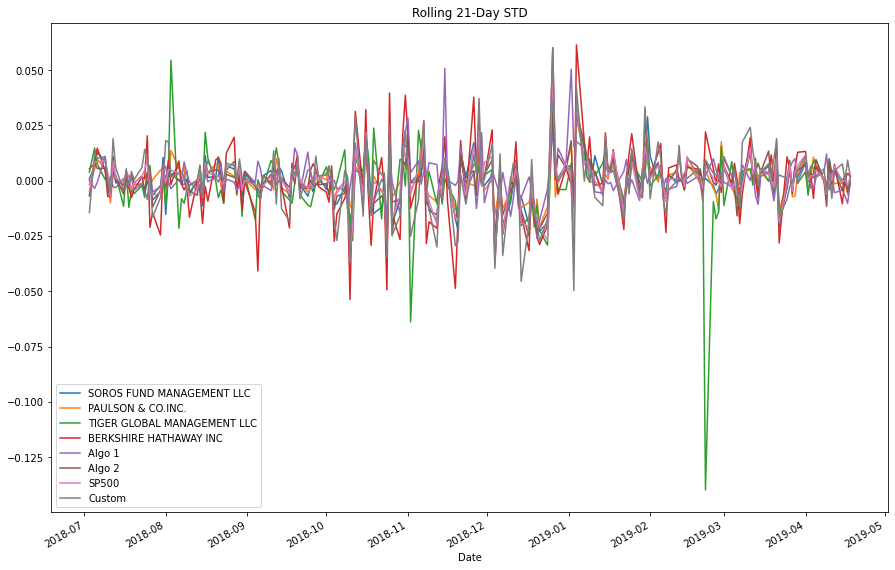

In [47]:
# Calculate rolling standard deviation
portfolio_rolling_std = portfolio.rolling(window=21).std()
# Plot rolling standard deviation
portfolio.iloc[840:1040].plot(title='Rolling 21-Day STD', figsize=(15,10))

### Calculate and plot the correlation

<AxesSubplot:>

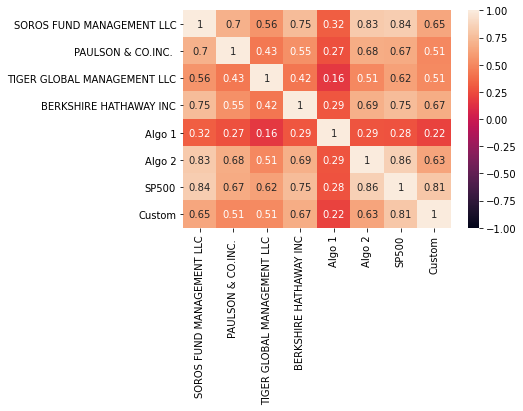

In [48]:
# Calculate and plot the correlation
port_corr = portfolio.corr()
sns.heatmap(port_corr, vmin=-1, vmax=1,annot=True)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

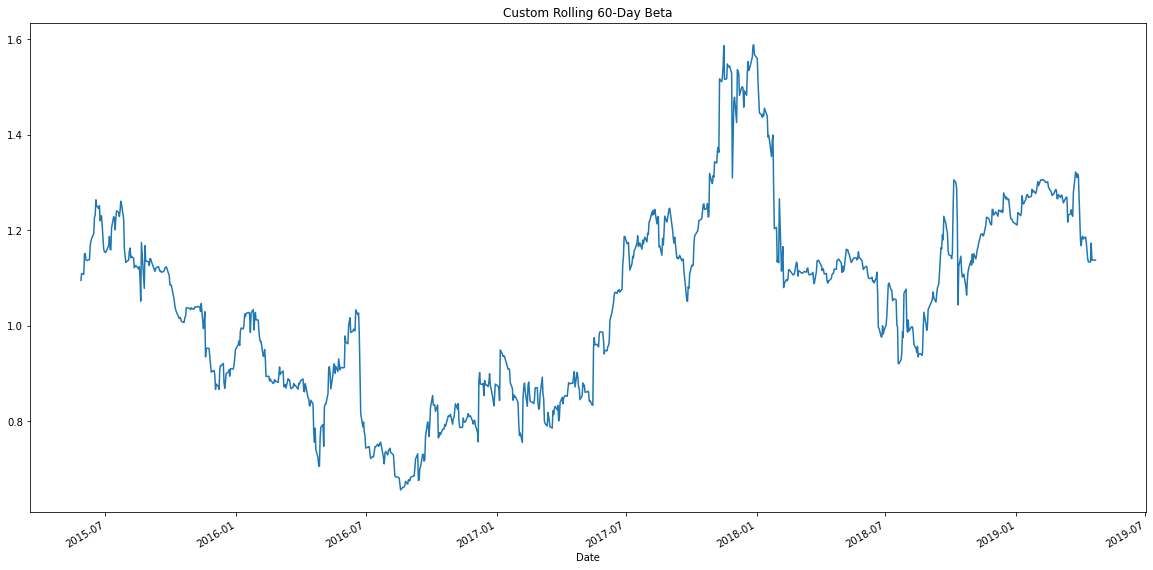

In [50]:
# Calculate and plot Beta
custom_cov = portfolio['Custom'].rolling(window=60).cov(portfolio['SP500'])

variance_sp500 = portfolio['SP500'].rolling(window=60).var()

custom_beta = custom_cov / variance_sp500
custom_beta_plot = custom_beta.plot(title='Custom Rolling 60-Day Beta', figsize=(20,10))

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

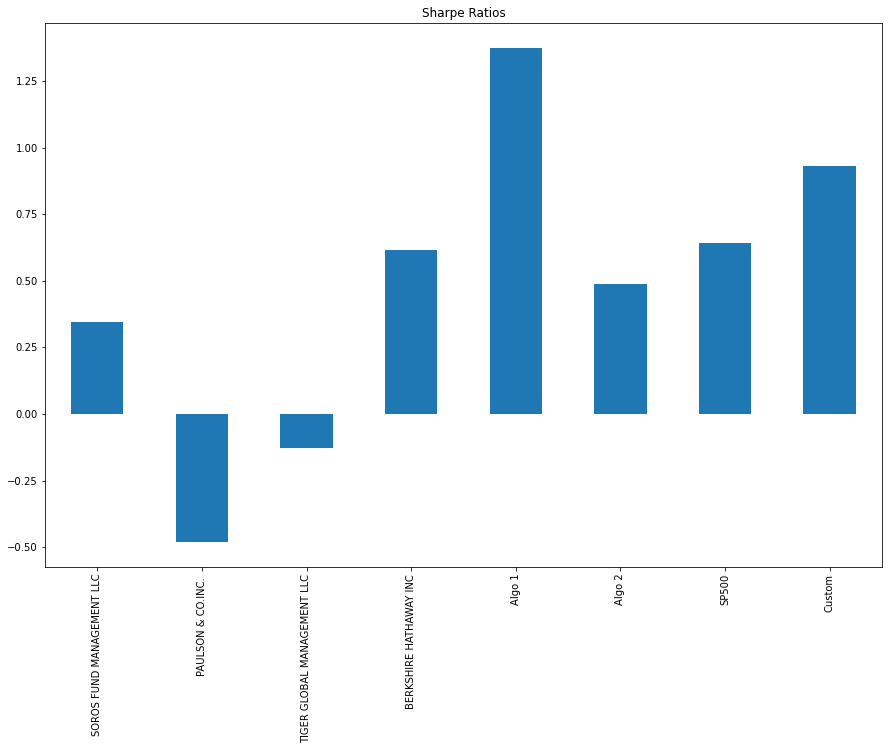

In [51]:
# Calculate Annualzied Sharpe Ratios

portfolio_sharpe = ((portfolio.mean() * 252) / (portfolio.std() * np.sqrt(252)))

# Visualize the sharpe ratios as a bar plot
portfolio_sharpe_plot = portfolio_sharpe.plot(kind="bar", title="Sharpe Ratios", figsize=(15,10))

### How does your portfolio do?

Write your answer here!

"Pretty Pretty Good" -Larry David.  The Algo 1 Portfolio achieved the highest risk adjusted returns, but my humble 'Custom' portfolio outperformed the SP500 on a risk adjusted basis.   